In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import trange

import actor_critic
import distributions
import importlib
importlib.reload(actor_critic)
importlib.reload(distributions)
from actor_critic import ActorCritic, EnvBatch

In [2]:
import warnings    
warnings.filterwarnings("error", category=RuntimeWarning)

In [3]:
environ_name = "CartPole-v0"
env = EnvBatch( lambda : actor_critic.make_env(environ_name, max_steps=500 ), n_envs=10 )

actor = actor_critic.ActorMLP(env=env, scale_model_inputs=False, activation='elu')
critic = actor_critic.CriticMLP(env=env, scale_model_inputs=False, activation='elu')

In [4]:
ac = ActorCritic(
                 env=env,
                 actor=actor, 
                 critic=critic,
                 entropy_coef=0.1,
                 actor_learning_rate=0.001,
                 critic_learning_rate=0.01
                )

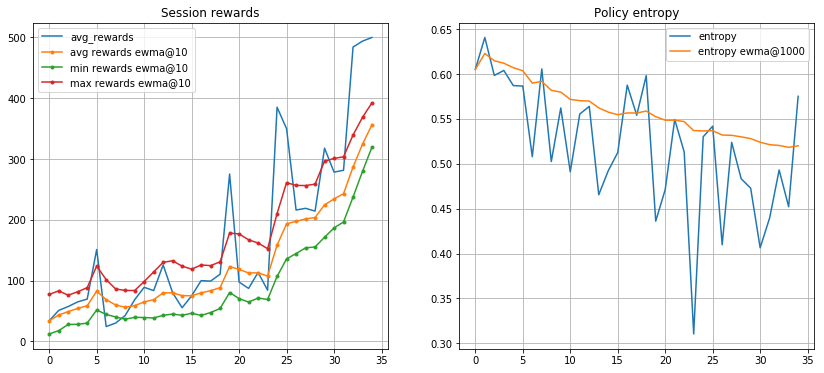

([33.8,
  50.8,
  57.2,
  64.8,
  69.4,
  151.0,
  24.2,
  30.0,
  42.4,
  68.4,
  88.8,
  83.4,
  125.6,
  79.8,
  55.2,
  74.8,
  99.8,
  99.0,
  110.4,
  275.2,
  97.4,
  87.0,
  113.4,
  84.0,
  385.2,
  349.8,
  216.0,
  218.8,
  214.2,
  317.8,
  278.4,
  281.4,
  484.2,
  494.0,
  500.0],
 [12.0,
  22.0,
  43.0,
  28.0,
  35.0,
  113.0,
  21.0,
  26.0,
  23.0,
  51.0,
  38.0,
  35.0,
  61.0,
  53.0,
  34.0,
  61.0,
  27.0,
  68.0,
  83.0,
  196.0,
  26.0,
  39.0,
  101.0,
  58.0,
  276.0,
  265.0,
  183.0,
  196.0,
  162.0,
  243.0,
  255.0,
  241.0,
  421.0,
  470.0,
  500.0],
 [77.0,
  88.0,
  65.0,
  93.0,
  105.0,
  225.0,
  31.0,
  34.0,
  75.0,
  83.0,
  156.0,
  177.0,
  195.0,
  143.0,
  86.0,
  98.0,
  155.0,
  120.0,
  158.0,
  386.0,
  171.0,
  124.0,
  138.0,
  111.0,
  468.0,
  489.0,
  236.0,
  255.0,
  269.0,
  466.0,
  321.0,
  316.0,
  500.0,
  500.0,
  500.0],
 [0.6051241,
  0.6406953,
  0.5983755,
  0.60396415,
  0.5871077,
  0.58659184,
  0.50793606,
  0.6056

In [5]:
ac.train_and_display(n_iters=5001, n_games_per_plot_update=5, gamma=0.99, stop_score=500 )